In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score , classification_report

In [2]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import AdaBoostClassifier

In [3]:
data = pd.read_csv('../dataset/heart.csv')
data.sample(5)

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
259,38,1,3,120,231,0,1,182,1,3.8,1,0,3,0
301,57,1,0,130,131,0,1,115,1,1.2,1,1,3,0
72,29,1,1,130,204,0,0,202,0,0.0,2,0,2,1
289,55,0,0,128,205,0,2,130,1,2.0,1,1,3,0
31,65,1,0,120,177,0,1,140,0,0.4,2,0,3,1


In [4]:
data.isna().sum()

age         0
sex         0
cp          0
trestbps    0
chol        0
fbs         0
restecg     0
thalach     0
exang       0
oldpeak     0
slope       0
ca          0
thal        0
target      0
dtype: int64

In [5]:
data.shape

(303, 14)

In [6]:
data.duplicated().sum()

1

In [7]:
data.drop_duplicates(inplace=True)

In [8]:
data.shape

(302, 14)

In [9]:
y = data['target']
X = data.drop(['target'],axis = 1)

In [10]:
 X_train, X_test, y_train, y_test = train_test_split(X, y , test_size= 0.2, random_state= 666)

In [11]:
dtree = DecisionTreeClassifier()
rand_forest = RandomForestClassifier(n_jobs= -1)
ada_boost = AdaBoostClassifier(learning_rate= 10** -0)

# DecisionTreeClassifier

In [12]:
dtree.fit(X_train , y_train)

DecisionTreeClassifier()

In [13]:
dtree.feature_importances_

array([0.0554598 , 0.06662006, 0.25899118, 0.02392621, 0.13313367,
       0.00439425, 0.        , 0.0985152 , 0.        , 0.09582326,
       0.02856858, 0.13627142, 0.09829638])

In [14]:
features = X_train.columns
features

Index(['age', 'sex', 'cp', 'trestbps', 'chol', 'fbs', 'restecg', 'thalach',
       'exang', 'oldpeak', 'slope', 'ca', 'thal'],
      dtype='object')

In [15]:
for feat , imp in zip(features , dtree.feature_importances_):
    print(f' {feat} : {round(imp * 100 ,2)}% ')

 age : 5.55% 
 sex : 6.66% 
 cp : 25.9% 
 trestbps : 2.39% 
 chol : 13.31% 
 fbs : 0.44% 
 restecg : 0.0% 
 thalach : 9.85% 
 exang : 0.0% 
 oldpeak : 9.58% 
 slope : 2.86% 
 ca : 13.63% 
 thal : 9.83% 


# RandomForestClassifier

In [16]:
rand_forest.fit(X_train , y_train)

RandomForestClassifier(n_jobs=-1)

In [17]:
for feat , imp in zip(features , rand_forest.feature_importances_):
    print(f' {feat} : {round(imp * 100 ,2)}% ')

 age : 9.09% 
 sex : 4.61% 
 cp : 11.25% 
 trestbps : 7.35% 
 chol : 7.77% 
 fbs : 0.99% 
 restecg : 2.05% 
 thalach : 12.03% 
 exang : 5.66% 
 oldpeak : 10.98% 
 slope : 4.74% 
 ca : 13.16% 
 thal : 10.3% 


# AdaBoostClassifier

In [18]:
ada_boost.fit(X_train , y_train)

AdaBoostClassifier(learning_rate=1)

In [19]:
for feat , imp in zip(features , ada_boost.feature_importances_):
    print(f' {feat} : {round(imp * 100 ,2)}% ')

 age : 22.0% 
 sex : 6.0% 
 cp : 2.0% 
 trestbps : 8.0% 
 chol : 14.0% 
 fbs : 0.0% 
 restecg : 2.0% 
 thalach : 16.0% 
 exang : 4.0% 
 oldpeak : 12.0% 
 slope : 2.0% 
 ca : 8.0% 
 thal : 4.0% 


In [20]:
y_pred_tree = dtree.predict(X_test)
y_pred_forest = rand_forest.predict(X_test)
y_pred_ada  = ada_boost.predict(X_test)

In [21]:
print('\t\t Decision Tree')
print(classification_report(y_test , y_pred_tree))

		 Decision Tree
              precision    recall  f1-score   support

           0       0.69      0.67      0.68        30
           1       0.69      0.71      0.70        31

    accuracy                           0.69        61
   macro avg       0.69      0.69      0.69        61
weighted avg       0.69      0.69      0.69        61



In [22]:
print('\t\t Random Forest')
print(classification_report(y_test , y_pred_forest))

		 Random Forest
              precision    recall  f1-score   support

           0       0.82      0.77      0.79        30
           1       0.79      0.84      0.81        31

    accuracy                           0.80        61
   macro avg       0.80      0.80      0.80        61
weighted avg       0.80      0.80      0.80        61



In [23]:
print('\t\t Ada Boost')
print(classification_report(y_test , y_pred_ada))

		 Ada Boost
              precision    recall  f1-score   support

           0       0.77      0.77      0.77        30
           1       0.77      0.77      0.77        31

    accuracy                           0.77        61
   macro avg       0.77      0.77      0.77        61
weighted avg       0.77      0.77      0.77        61



# Support Vector Machine

In [37]:
from sklearn.datasets import make_moons, make_circles

In [25]:
from mlxtend.plotting import plot_decision_regions

# Make_moons

# x, y = make_moons(n_samples= 500, noise=0.1)
x, y = make_circles(n_samples= 500, noise=0.1,factor= 0.2)

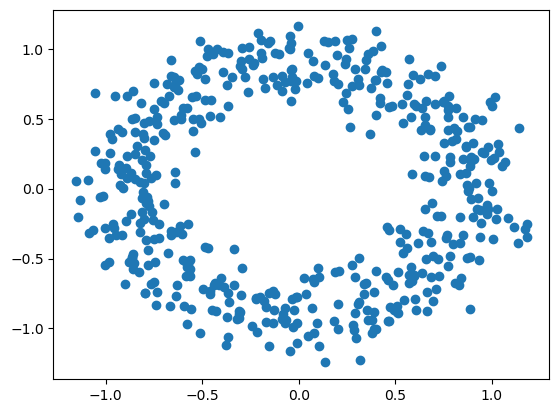

In [40]:
plt.scatter(x[:,0],x[:,1])
plt.show()

In [41]:
from sklearn.svm import SVC   # support vector classifier

In [42]:
svc = SVC()

In [43]:
svc.fit(x, y)

SVC()

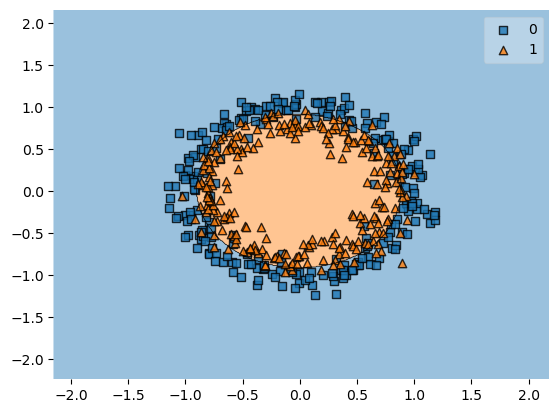

In [45]:
plot_decision_regions(x, y, svc)
plt.show()